## 1.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("/content/gdrive/MyDrive/Econ441B/Country-data.csv", sep = ",")

In [5]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [6]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [7]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [8]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 2.) Fit a kmeans Model with any Number of Clusters

In [9]:
kmeans = KMeans(n_clusters=5
                , random_state=42).fit(X_scaled)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# 3.) Pick two features to visualize across

In [10]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

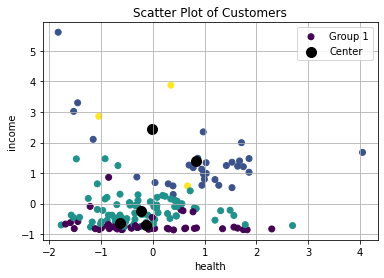

In [11]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 2
x2_index = 4


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 4.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [12]:
WCSSs=[]
Ks=range(1,15)
for k in Ks:
  kmeans=KMeans(n_clusters=k,n_init=30,init='random')
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)


# 5.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

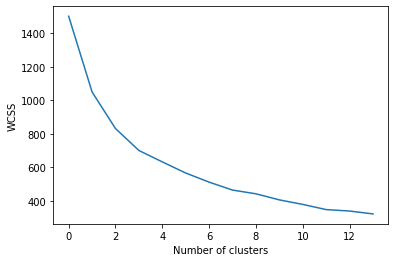

In [13]:
plt.plot(WCSSs)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

I set the number of cluster=2, since I want to classify all the countries into two group: the developed country and the developing country.And we can also see that the WCSS drops a lot even at k=2

In [14]:
k=2
kmeans=KMeans(n_clusters=k,n_init=30,init='random').fit(X_scaled)
preds = kmeans.predict(X_scaled)

# 6.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [15]:
preds=pd.DataFrame(preds)
output=pd.concat([preds,X,names],axis=1)
output.head()

,0,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country
0,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Afghanistan
1,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Albania
2,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Algeria
3,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Angola
4,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Antigua and Barbuda


In [24]:
cluster1=output[output[0]==0]['country'].tolist()
cluster2=output[output[0]==1]['country'].tolist()
print(cluster1)
print(cluster2)

['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bhutan', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Hungary', 'Iceland', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Moldova', 'Montenegro', 'Morocco', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 

The cluster1 contains more developed countries such as Australia, Belgium,United States and so on. And the cluster2 contains more developing countries such as Afganistan and Cambodia.

#7.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [17]:
table=output.groupby(0).mean()
print(table)

   child_mort    exports    health    imports        income  inflation  \
0                                                                        
0   12.161616  48.603030  7.314040  49.121212  26017.171717   5.503545   
1   76.280882  30.198515  6.090147  43.642146   4227.397059  11.098750   

   life_expec  total_fer          gdpp  
0                                       
0   76.493939   1.941111  20507.979798  
1   61.910294   4.413824   1981.235294  


# 8.) Write an observation about the descriptive statistics.

As we can see from the table of mean vlause above, the developed countries have much higher exports, income,life expentancy and gdp and they have much lower child mortality rate and inflation rate compared to the developing countries. 